In [42]:
# To study and perform regression on student performance data
# To create missing values in the data and see the best missing values imputation strategies

In [30]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Read Data

In [4]:
file_path = Path('/home/device1/predictive_ml/Student_Performance.csv')
if file_path.exists() and file_path.suffix == '.csv':
    df = pd.read_csv(file_path)
else:
    df = None

In [6]:
# Seems to be no missiing values 
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Data Exploration

In [9]:
# No missing Values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
df['Hours']

In [10]:
t = df.columns.copy()

In [17]:
# change_func = lambda x  : x.strip().lower().replace(' ', '_')
def change_column_names(col_name):
    return col_name.strip().lower().replace(' ', '_')
change_column_name_func = lambda x : x.strip().lower().replace(' ', '_')

df.columns = [change_column_name_func(col_name) for col_name in df.columns]
# df.columns = df.apply(change_func, axis = 'columns')

In [18]:
df.columns

Index(['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index'],
      dtype='object')

In [19]:
df.describe()

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


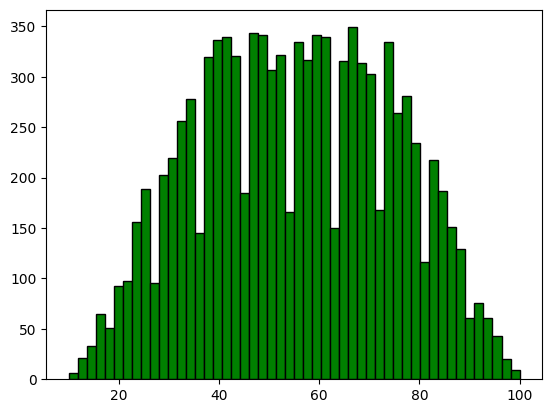

In [28]:
plt.hist(df['performance_index'], bins = 50, color = 'green', edgecolor = 'black')
plt.show()

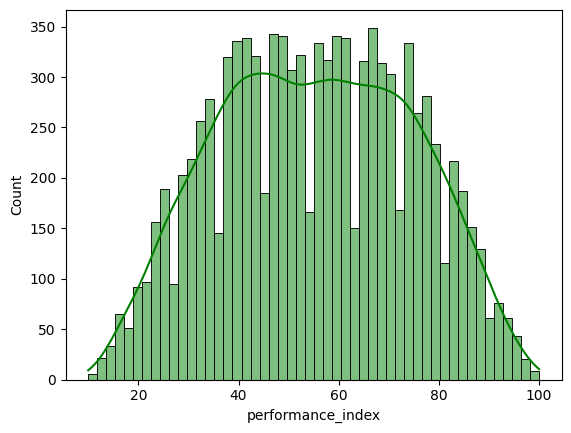

In [35]:
sns.histplot(df['performance_index'], bins=50, color='green', edgecolor='black', kde=True)
plt.show()

In [38]:
df.sample(3)

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
5477,7,46,Yes,8,8,38.0
2435,3,89,No,4,4,68.0
4739,6,46,Yes,5,5,34.0


<Axes: ylabel='performance_index'>

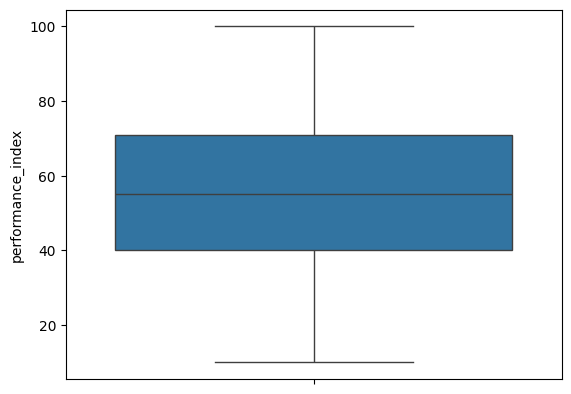

In [41]:
# Not much outliers 
# Most of the values are within the fixed range and dont exceed set limits
# 
sns.boxplot(df['performance_index'])

In [49]:
# To see if the values are exceeding the normal h
df[df['hours_studied']> 10]

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index


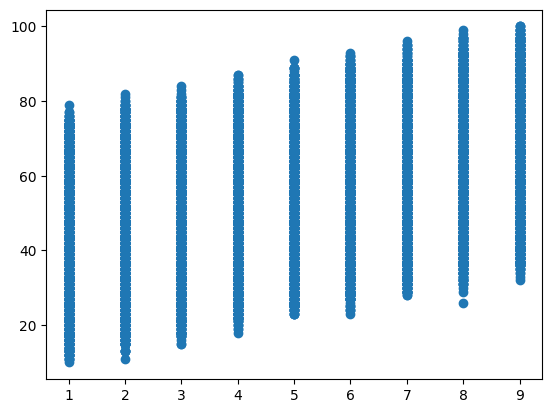

In [48]:
# Best studied as categorical variable
# Hours studied although numerial does not have high variance
plt.scatter(df['hours_studied'], df['performance_index'])
plt.show()